Plotting Polynomial Regression for Degree 1:


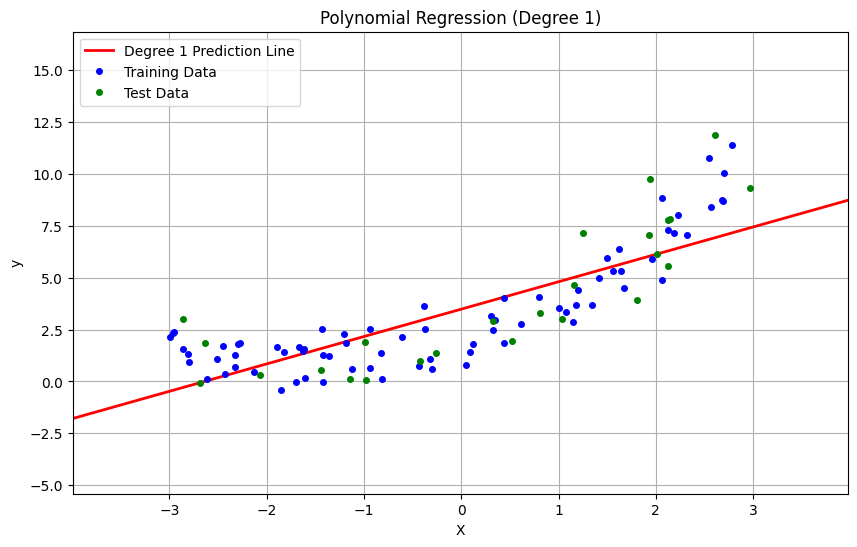


Plotting Polynomial Regression for Degree 2:


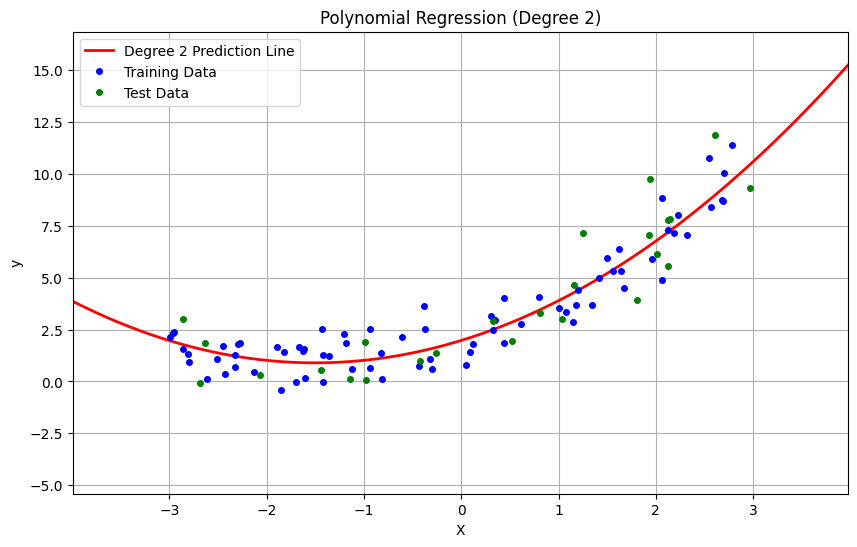


Plotting Polynomial Regression for Degree 10:


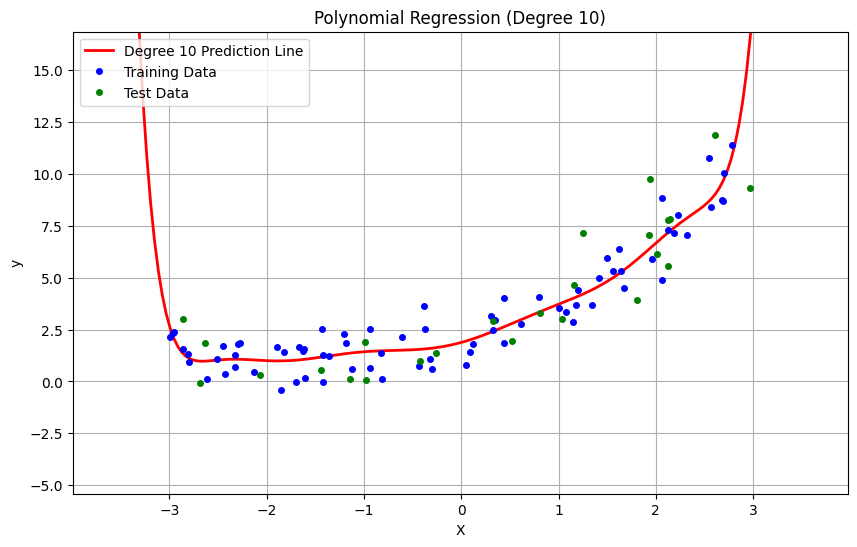

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline # Import Pipeline

# --- 1. Generate Synthetic Data (as seen in previous examples) ---
# This creates a non-linear relationship (quadratic) with some noise
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)

# --- 2. Train-Test Split ---
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# --- 3. Define the Polynomial Regression Function using Pipeline ---
def poly_regression(degree):
    """
    Builds, fits, and plots a polynomial regression model using a scikit-learn Pipeline.

    Args:
        degree (int): The degree of the polynomial features to use.
    """
    # Create a range of new X values for plotting the fitted curve smoothly
    X_new = np.linspace(X.min() - 1, X.max() + 1, 200).reshape(-1, 1) # Extend range slightly for better visualization

    # Define the pipeline steps:
    # 1. PolynomialFeatures: Transforms the input X into polynomial features (e.g., X, X^2, X^3)
    # 2. LinearRegression: Fits a linear model to these polynomial features
    poly_regression_pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=True)), # include_bias=True for the intercept term
        ("lin_reg", LinearRegression())
    ])

    # Fit the entire pipeline to the training data
    # This step first transforms X_train using PolynomialFeatures, then fits LinearRegression
    poly_regression_pipeline.fit(X_train, y_train)

    # Predict y values for the new X range using the fitted pipeline
    # This step first transforms X_new using PolynomialFeatures, then predicts with LinearRegression
    y_pred_new = poly_regression_pipeline.predict(X_new)

    # --- Plotting the Prediction Line and Data Points ---
    plt.figure(figsize=(10, 6)) # Create a new figure for each plot
    plt.plot(X_new, y_pred_new, 'r-', label=f"Degree {degree} Prediction Line", linewidth=2) # Fitted regression line
    plt.plot(X_train, y_train, "b.", markersize=8, label="Training Data") # Original training data points
    plt.plot(X_test, y_test, "g.", markersize=8, label="Test Data") # Original test data points

    plt.legend(loc="upper left") # Place legend in the upper left corner
    plt.xlabel("X") # Label for the x-axis
    plt.ylabel("y") # Label for the y-axis
    plt.title(f"Polynomial Regression (Degree {degree})") # Title of the plot
    plt.axis([X.min() - 1, X.max() + 1, y.min() - 5, y.max() + 5]) # Set axis limits for better viewing
    plt.grid(True) # Add a grid for readability
    plt.show() # Display the plot

# --- 4. Call the function to demonstrate for different degrees ---
# Example usage:
print("Plotting Polynomial Regression for Degree 1:")
poly_regression(1) # Linear regression

print("\nPlotting Polynomial Regression for Degree 2:")
poly_regression(2) # Quadratic regression (should fit the synthetic data well)

print("\nPlotting Polynomial Regression for Degree 10:")
poly_regression(10) # Higher degree, potentially overfitting